# ТВиМС Задания 2 и 3

## Вариант 14

***

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

import base
import hist
import taskdata
import extras

from ipywidgets import interact, fixed

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

***

## Аналитическое расчеты:

![title](imgs/img2.jpg)

***

## Задание 2:

In [3]:
def plot_alpha(n, m, bincount_choice='auto', histogram=True, polygon=True, analytic=True, nmode='плотность', cumulative=False):
    if bincount_choice == 'auto':
        m = extras.optimal_bin_count(n)

    # plotting analytic func:
    if analytic:
        domain = np.linspace(taskdata.y_a, taskdata.y_b, 1000)
        if not cumulative:
            func = taskdata.fy_deduced
            label = 'аналитическая функция плотности'
        else:
            func = taskdata.Fy_deduced
            label = 'аналитическая функция распределения'
        analytic_ps = [func(y) for y in domain]
        plt.plot(domain, analytic_ps, label=label)

    vs = base.generate_varseries(taskdata.get_y, n)
    hdata = hist.equalbin(vs, m, nmode)

    # plotting histogram:
    if histogram:
        hist.plot_hist_w_mode(vs, m, nmode, cumulative=cumulative)
        hist.plot_orig_histogram(hdata, cumulative=cumulative)

    # plotting frequency polygon:
    if polygon:
        hist.plot_polygon(hdata, cumulative=cumulative)

    plt.legend()
    plt.show()

## Гистограмма. Равноинтервальный метод. Полигон распределения. Аналитическая функция плотности.

#### Interactive (not working on github):

In [4]:
interact(plot_alpha, n=(1, 1000000), m=(1, 1000), bincount_choice=['auto', 'manual'], histogram=[True, False], polygon=[True, False], analytic=[True, False], nmode=['частоты', 'частости', 'плотность'], cumulative=[True, False])

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=500, descr…

<function __main__.plot_alpha(n, m, bincount_choice='auto', histogram=True, polygon=True, analytic=True, nmode='плотность', cumulative=False)>

#### Demo:

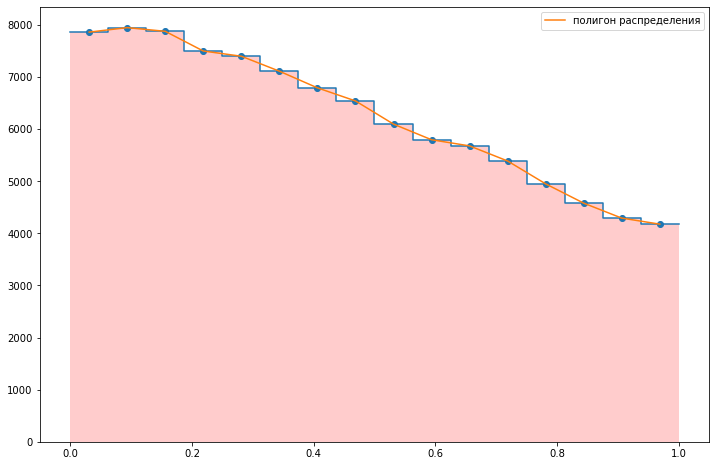

In [10]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='nope')

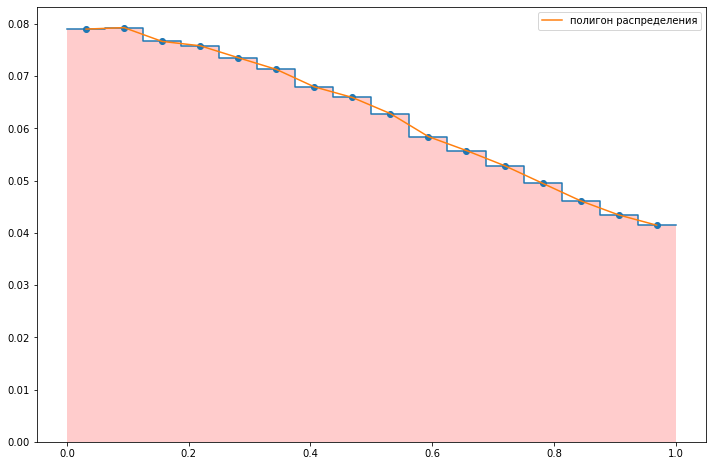

In [11]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='simple')

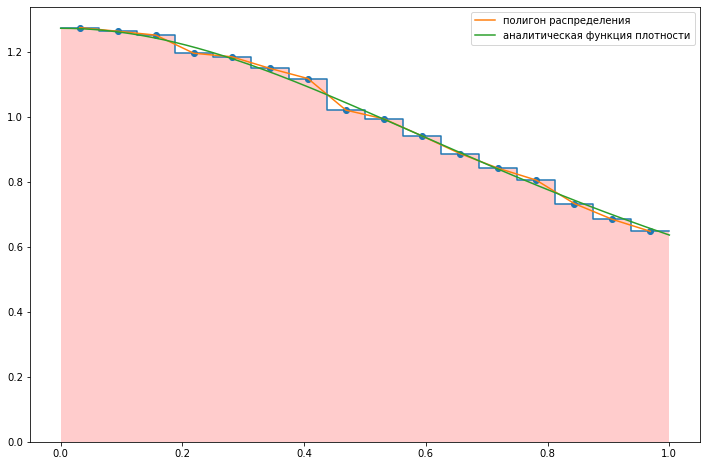

In [12]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='for f(y)')

## Эмпирическая функция распределения по сгруппированным данным.

#### Interactive (not working on github):

In [15]:
interact(plot_empirical_alpha, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32), analytic_func=fixed(Fy_deduced))

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_empirical_alpha(a, b, n, group_num, analytic_func)>

#### Demo:

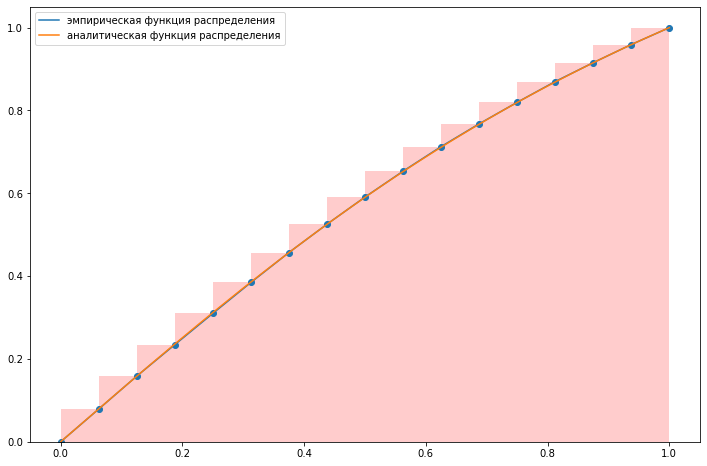

In [16]:
plot_empirical_alpha(0, 1, 100000, 16, Fy_deduced)

***

## Задание 3:

#### Interactive (not working on github):

In [19]:
interact(plot_histogram_beta_and_polygon_and_fy, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32))

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_histogram_beta_and_polygon_and_fy(a, b, n, group_num)>

#### Demo:

In [20]:
# plot_histogram_beta_and_polygon_and_fy(0, 1, 100_000_000, 41)